In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [179]:
matplotlib.rcParams["figure.figsize"]=(20,10)
%matplotlib inline

In [180]:
address='/content/drive/MyDrive/ColabNotebooks/KPMG Virtual Internship/data quality/kpmgdata.xlsx'

In [181]:
customers=pd.read_excel(address,sheet_name='CustomerDemographic',header=1)

#Elementary Analysis

In [182]:
customers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


it has 4000 rows and 13 columns

In [183]:
c=customers.copy()

In [184]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [185]:
c.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

missing values are present

**vizualizing places where values are missing**

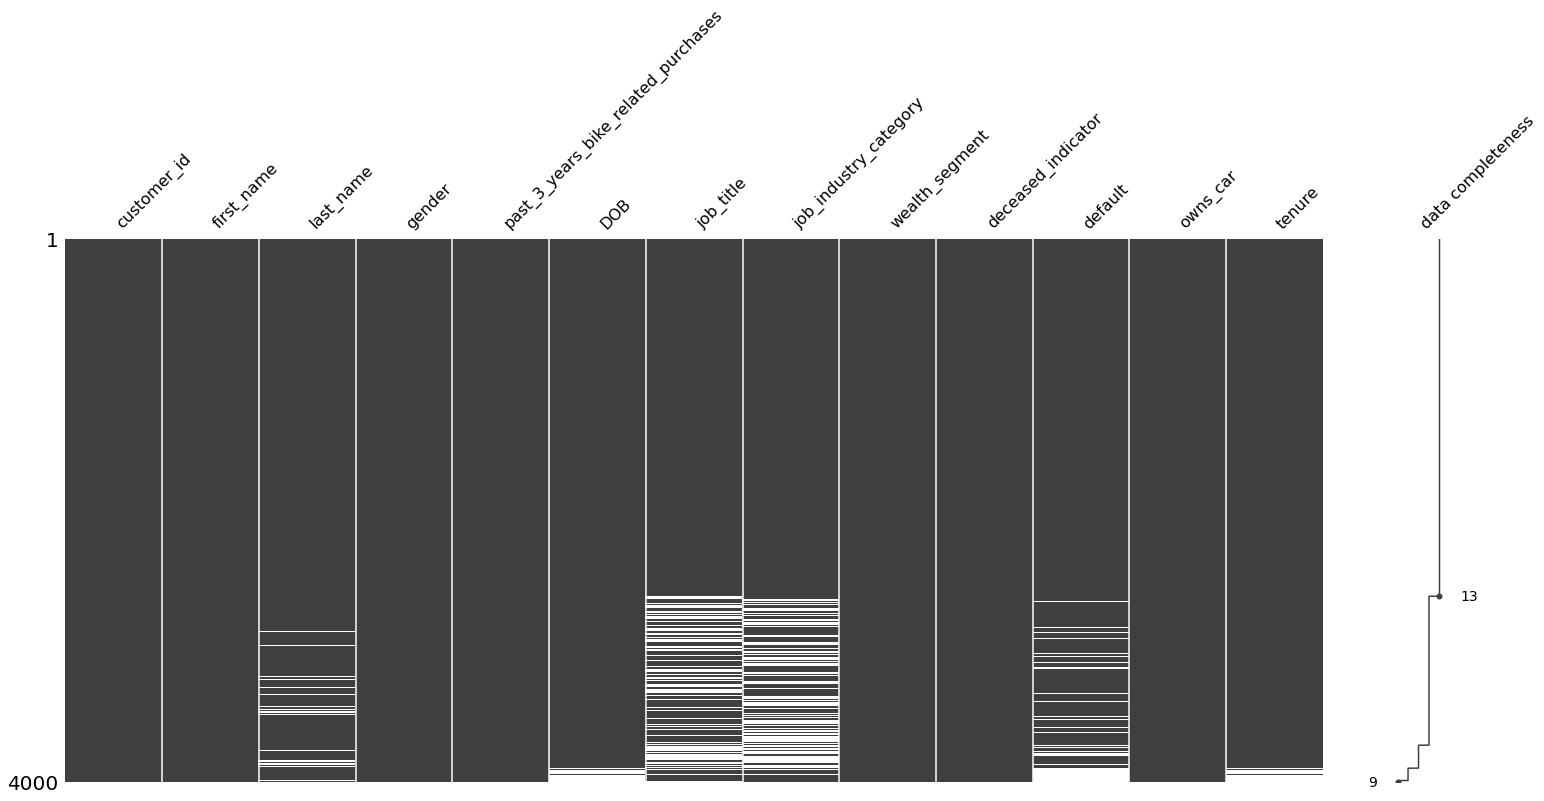

In [186]:
import missingno as msno
msno.matrix(c, labels=True, sort="descending")

**visualizing percentage of values missing in each column**

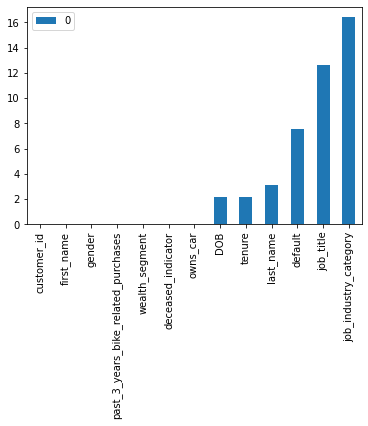

In [187]:
pd.DataFrame((c.isna().sum()*100/len(c)).sort_values()).plot.bar()

In [188]:
c.customer_id.nunique()

4000

all customer ids are unique

In [189]:
for i in c.columns:
  print(f' for column {i} no of unique values-- {c[i].nunique()}')

 for column customer_id no of unique values-- 4000
 for column first_name no of unique values-- 3139
 for column last_name no of unique values-- 3725
 for column gender no of unique values-- 6
 for column past_3_years_bike_related_purchases no of unique values-- 100
 for column DOB no of unique values-- 3448
 for column job_title no of unique values-- 195
 for column job_industry_category no of unique values-- 9
 for column wealth_segment no of unique values-- 3
 for column deceased_indicator no of unique values-- 2
 for column default no of unique values-- 90
 for column owns_car no of unique values-- 2
 for column tenure no of unique values-- 22


#checking unique values in gender,job_title,job_industry_category, wealth_segment, deceased_indicator,owns_car

In [190]:
c.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [191]:
for i in c.columns[[3,6,7,8,9,11]]:
  print(f'for column {i} the unique values are')
  print(c[i].unique())
  print('*'*100)

for column gender the unique values are
['F' 'Male' 'Female' 'U' 'Femal' 'M']
****************************************************************************************************
for column job_title the unique values are
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurs

In [192]:
for i in c.job_industry_category.unique():
  if type(i) != str:
    print('not',type(i))

not <class 'float'>


#checking DOB

In [193]:
c.DOB.value_counts()

1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

In [194]:
c.DOB.dt.year.sort_values()

33      1843.0
719     1931.0
1091    1935.0
3409    1940.0
2412    1943.0
         ...  
3778       NaN
3882       NaN
3930       NaN
3934       NaN
3997       NaN
Name: DOB, Length: 4000, dtype: float64

In [195]:
c[c.DOB.dt.year==1843]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


customer id 34 has the DOB in the year 1843. This seems a mistake.

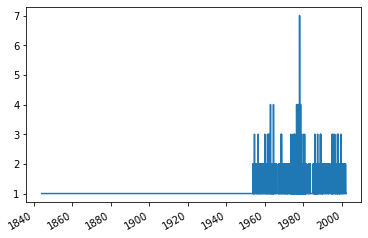

In [196]:
c.DOB.value_counts().plot()

In [197]:
c[c.DOB.dt.year>=2000]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
14,15,Erroll,Radage,Male,91,2000-07-13,Junior Executive,Manufacturing,Mass Customer,N,ð,No,1.0
18,19,Sorcha,Keyson,Female,76,2001-04-15,Geological Engineer,Manufacturing,High Net Worth,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
58,59,Niki,Heathcote,Male,60,2000-02-08,Physical Therapy Assistant,NaN,High Net Worth,N,-1,No,3.0
65,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
104,105,Maribeth,Pristnor,Female,25,2001-09-17,Recruiting Manager,Manufacturing,Mass Customer,N,"<>?:""{}|_+",No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,3850,Alexandro,McCullock,Male,55,2000-01-07,Accountant III,NaN,Mass Customer,N,ç°ä¸­ããã«ããã¦ä¸ãã,Yes,2.0
3948,3949,Costa,Sleightholm,Male,24,2001-12-19,Web Designer IV,Manufacturing,High Net Worth,N,-0.5,Yes,1.0
3953,3954,Archaimbaud,McAteer,Male,63,2000-02-03,Human Resources Assistant III,Financial Services,High Net Worth,N,-100,No,2.0
3959,3960,Hobart,Burgan,Male,6,2000-03-16,NaN,Property,Mass Customer,N,ðµ ð ð ð,No,1.0


#calculating age as of january 1st 2017

In [198]:
from datetime import datetime,date

In [199]:
d=date(2017,1,1)
d

datetime.date(2017, 1, 1)

In [200]:
from dateutil.relativedelta import relativedelta

In [201]:
def func(x):
  try:
    return relativedelta(d,x).years
  except:
    return x

  

In [202]:
c['age']=c.DOB.apply(func)

In [203]:
c

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,63
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,36
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,62
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,55
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,41
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,15
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaT
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,43


In [204]:
c.age.unique()

array([63, 36, 62, 55, 39, 50, 40, 54, 43, 28, 22, 61, 33, 16, 49, 15, 21,
       38, 48, 59, 173, 53, 31, 37, 35, 41, 44, 24, 57, 60, 20, 46, 51,
       14, 56, 42, 47, 23, 27, 30, 58, 32, 18, 19, 26, 17, 34, 52, 29,
       NaT, 45, 25, 72, 85, 81, 73, 76], dtype=object)

In [205]:
c[c['age']<c['tenure']]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
1520,1521,Pernell,Duffett,Male,49,1995-11-13,Business Systems Development Analyst,Financial Services,Affluent Customer,N,',Yes,22.0,21
2053,2054,Horace,Gilpillan,Male,12,1995-08-21,NaN,Manufacturing,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,Yes,22.0,21


for these 2 ids we saw that their ages are almost equal to their tenure which is absurd

#checking deceased people

In [206]:
c[c.deceased_indicator=='Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,-0.5,Yes,6.0,46
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,9.0,57


2 customers are deceased

In [207]:
c.head(4)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,63
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,36
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,62
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,55


In [208]:
c.drop('default',axis=1,inplace=True)

#checking missing DOB values

In [209]:
c[c.DOB.isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN,NaT
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN,NaT
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN,NaT
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN,NaT
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN,NaT
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN,NaT
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN,NaT
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN,NaT


#checking past_3_years_bike_related_purchases

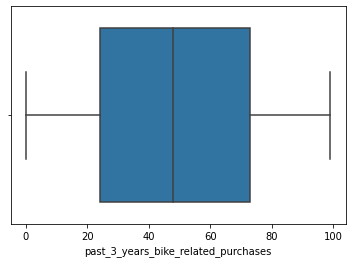

In [210]:
sns.boxplot(c.past_3_years_bike_related_purchases)

In [211]:
c.sort_values('past_3_years_bike_related_purchases')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
427,428,Freida,Everil,Female,0,1977-05-03,Structural Engineer,Health,High Net Worth,N,Yes,14.0,39
1299,1300,Sisely,Strelitzer,Female,0,1991-03-10,Physical Therapy Assistant,Financial Services,Affluent Customer,N,Yes,9.0,25
3142,3143,Corabelle,Streatfeild,Female,0,1996-10-24,Chief Design Engineer,Manufacturing,Mass Customer,N,No,5.0,20
485,486,Prudi,Edon,Female,0,1955-12-30,Technical Writer,Manufacturing,Affluent Customer,N,Yes,15.0,61
3548,3549,Jodee,Macewan,Female,0,1966-02-24,Sales Representative,Retail,Mass Customer,N,No,7.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1457,Leonore,Slixby,Female,99,1978-08-20,Speech Pathologist,NaN,Affluent Customer,N,Yes,12.0,38
2869,2870,Aldis,Chazerand,Male,99,1957-12-26,NaN,NaN,Mass Customer,N,No,11.0,59
2883,2884,Karola,Conneely,Female,99,1962-01-06,Assistant Professor,NaN,Mass Customer,N,No,15.0,54
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,39


In [212]:
f=c[c.past_3_years_bike_related_purchases==0]

In [213]:
f.shape

(38, 13)

the people for whom any bike bike related purchase in the last 3 years is 0, it can mean that they are either the new customer or it is a mistake.

#checking missing values related to job industry category and job title

In [214]:
c[c.job_industry_category.isna() & c.job_title.isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
22,23,Olav,Polak,Male,43,1995-02-10,NaN,NaN,High Net Worth,N,Yes,1.0,21
45,46,Kaila,Allin,Female,98,1972-02-26,NaN,NaN,Affluent Customer,N,Yes,15.0,44
73,74,Pansy,Kiddie,Female,94,1969-06-19,NaN,NaN,Mass Customer,N,Yes,6.0,47
107,108,Kayle,Mingaud,Female,4,1994-03-14,NaN,NaN,High Net Worth,N,No,3.0,22
160,161,Tadd,Bloss,Male,49,1976-01-21,NaN,NaN,Mass Customer,N,No,16.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,3840,Marc,Torrans,Male,27,1962-09-30,NaN,NaN,High Net Worth,N,No,5.0,54
3892,3893,Hadria,Moles,Female,7,1996-11-18,NaN,NaN,High Net Worth,N,Yes,4.0,20
3928,3929,Jacqui,Fortnam,Female,50,1989-10-18,NaN,NaN,Affluent Customer,N,Yes,10.0,27
3932,3933,Chiarra,Cops,Female,65,1983-07-05,NaN,NaN,High Net Worth,N,Yes,10.0,33


#NEW CUSTOMER

In [215]:
n=pd.read_excel(address,sheet_name='NewCustomerList',header=1)

#Elementary Analysis

In [216]:
n

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.05,1.0500,1.312500,1.115625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.58,0.5800,0.580000,0.580000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.42,0.5250,0.525000,0.525000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.90,0.9000,1.125000,1.125000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.97,0.9700,0.970000,0.970000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,1.05,1.0500,1.312500,1.115625,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.69,0.8625,0.862500,0.862500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.59,0.7375,0.737500,0.626875,997,997,0.357000


In [217]:
n.shape

(1000, 23)

In [218]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [219]:
n.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [220]:
n.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20'],axis=1,inplace=True)

In [221]:
n.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

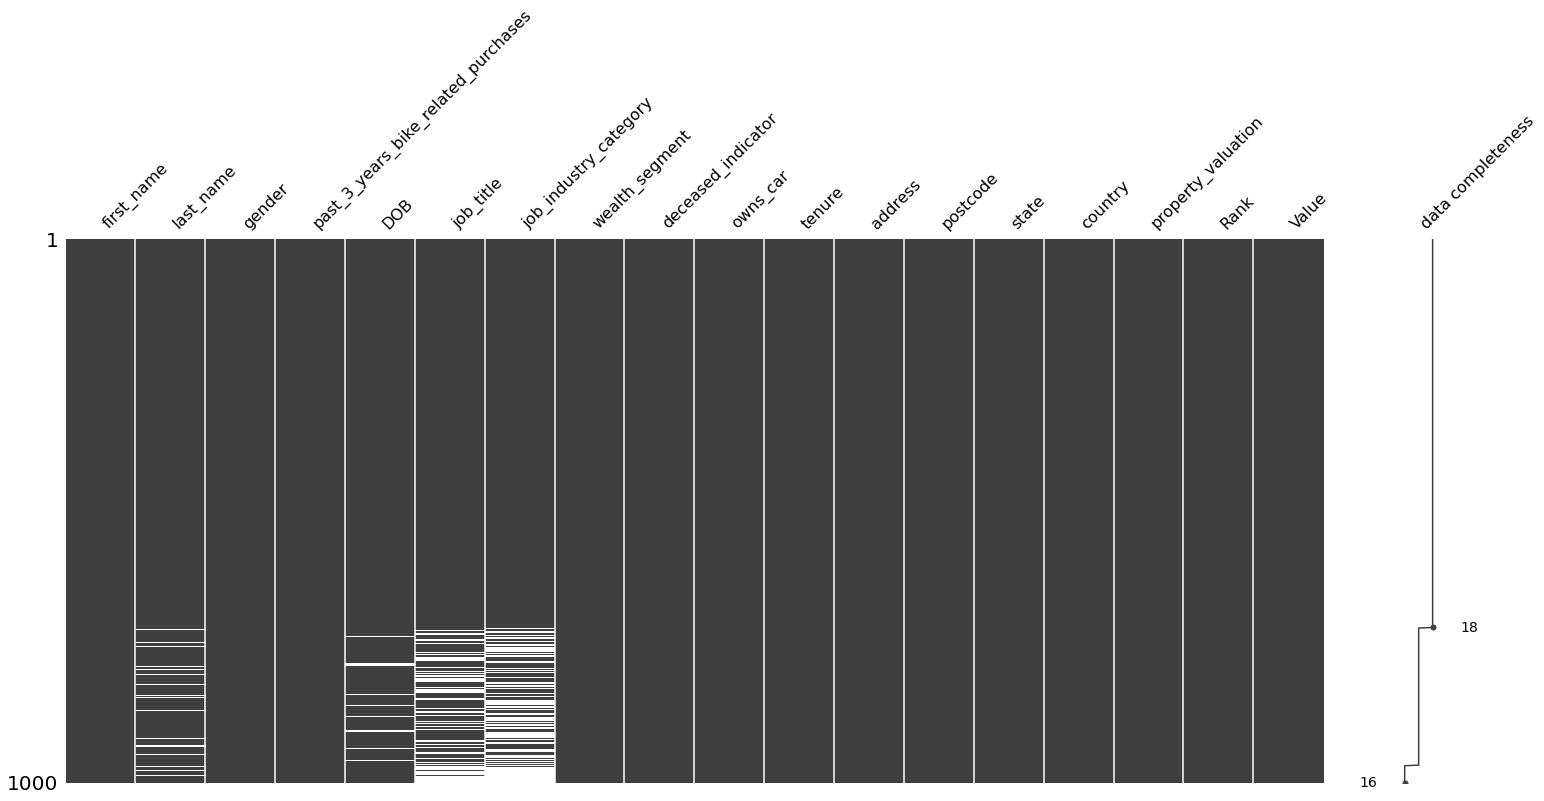

In [222]:
msno.matrix(n, labels=True, sort="descending")

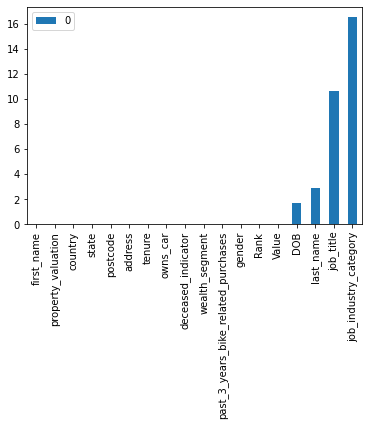

In [223]:
pd.DataFrame((n.isna().sum()*100/len(n)).sort_values()).plot.bar()

In [224]:
for i in n.columns:
  print(f' for column {i} no of unique values-- {n[i].nunique()}')

 for column first_name no of unique values-- 940
 for column last_name no of unique values-- 961
 for column gender no of unique values-- 3
 for column past_3_years_bike_related_purchases no of unique values-- 100
 for column DOB no of unique values-- 958
 for column job_title no of unique values-- 184
 for column job_industry_category no of unique values-- 9
 for column wealth_segment no of unique values-- 3
 for column deceased_indicator no of unique values-- 1
 for column owns_car no of unique values-- 2
 for column tenure no of unique values-- 23
 for column address no of unique values-- 1000
 for column postcode no of unique values-- 522
 for column state no of unique values-- 3
 for column country no of unique values-- 1
 for column property_valuation no of unique values-- 12
 for column Rank no of unique values-- 324
 for column Value no of unique values-- 324


#checking unique values in gender,job_title,job_industry_category, wealth_segment, deceased_indicator,owns_car

In [225]:
n.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [226]:
for i in n.columns[[2,5,6,7,8,9]]:
  print(f'for column {i} the unique values are')
  print(n[i].unique())
  print('*'*100)

for column gender the unique values are
['Male' 'Female' 'U']
****************************************************************************************************
for column job_title the unique values are
['General Manager' 'Structural Engineer' 'Senior Cost Accountant'
 'Account Representative III' 'Financial Analyst'
 'Assistant Media Planner' 'Compensation Analyst'
 'Human Resources Assistant II' 'Speech Pathologist'
 'Accounting Assistant IV' 'Programmer Analyst I'
 'Environmental Specialist' 'Human Resources Manager' 'VP Marketing'
 'Clinical Specialist' nan 'Associate Professor' 'Actuary'
 'Internal Auditor' 'Programmer I' 'Quality Engineer'
 'Quality Control Specialist' 'Account Executive' 'Engineer II' 'Nurse'
 'Librarian' 'Paralegal' 'Assistant Manager' 'Senior Quality Engineer'
 'Recruiting Manager' 'Design Engineer'
 'Business Systems Development Analyst' 'VP Quality Control'
 'Cost Accountant' 'Product Engineer' 'Social Worker'
 'Payment Adjustment Coordinator' 'Marketing 

#checking DOB

In [227]:
n.DOB.value_counts()

1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64

In [228]:
sorted(n.DOB.dt.year.unique())

[1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1994.0,
 nan,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0]

these values are permissible

#calculating age as of january 1 2017

In [229]:
n['age']=n.DOB.apply(func)

In [230]:
n[n['age']<n['tenure']]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age


#checking missing DOB values

In [231]:
n[n.DOB.isna()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000,NaT
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500,NaT
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000,NaT
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000,NaT
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500,NaT
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000,NaT
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250,NaT
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125,NaT
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875,NaT
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000,NaT


#checking last 3 years bike related purchases

In [232]:
n.sort_values('past_3_years_bike_related_purchases')

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
545,Katy,Crooke,Female,0,1977-06-30,Food Chemist,Health,Mass Customer,N,No,13,67081 Burrows Center,2111,NSW,Australia,12,546,0.823437,39
76,Tobias,Woodhams,Male,0,1961-04-15,Research Nurse,Health,Mass Customer,N,No,17,4 Valley Edge Plaza,2759,NSW,Australia,9,77,1.341406,55
904,Roth,Crum,U,0,NaT,Legal Assistant,IT,Mass Customer,N,No,2,276 Anthes Court,2450,NSW,Australia,6,904,0.500000,NaT
113,Meriel,Tapp,Female,0,1995-08-13,VP Sales,IT,Mass Customer,N,No,5,65 Milwaukee Hill,3280,VIC,Australia,2,114,1.275000,21
960,Sonia,Dunstall,Female,0,1975-07-30,Accountant III,Financial Services,Mass Customer,N,No,10,99 Park Meadow Hill,2570,NSW,Australia,9,960,0.442000,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Regine,Bownes,Female,99,1952-07-01,Senior Developer,Retail,Affluent Customer,N,No,15,255 Loeprich Lane,3752,VIC,Australia,9,166,1.175000,64
473,Irvine,Headon,Male,99,1956-04-21,Geologist III,IT,Affluent Customer,N,Yes,20,9 Hovde Way,2322,NSW,Australia,5,473,0.884000,60
705,Cissiee,Baylis,Female,99,1951-07-22,Cost Accountant,Financial Services,High Net Worth,N,No,16,18 Dottie Park,2230,NSW,Australia,11,700,0.687500,65
546,Sammy,Borsi,Female,99,1972-04-27,Accountant III,Financial Services,Mass Customer,N,No,5,0 Kipling Way,2289,NSW,Australia,7,546,0.823437,44


#checking +ve values

In [233]:
n.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')

In [234]:
n[n.property_valuation<0]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age


In [235]:
n[n.Rank<0]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age


In [236]:
n[n.Value<0]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age


the values here are permissible

#checking columns related to address

In [237]:
n.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')

In [238]:
cols=['postcode', 'state', 'country']

In [239]:
for i in cols:
  print(f'for column {i} the unique values are')
  print(n[i].unique())
  print('*'*100)

for column postcode the unique values are
[4500 2113 3505 4814 2093 4075 2620 2200 4151 4573 3216 2032 2232 4053
 2500 4051 3040 2222 2190 2161 2783 4744 2257 4703 4817 2640 4000 4171
 3056 2280 2470 4122 3226 2017 3190 3280 2160 2756 3149 2024 2761 3027
 2034 4852 4305 3741 2067 3174 4017 3805 3166 2226 2750 3196 3156 3810
 2763 2072 4504 4214 2168 4208 4078 4036 4173 2484 2121 4068 2147 2219
 2759 3030 2212 2518 2097 2046 3161 2576 2026 2035 2479 4670 2125 2263
 2015 4037 4510 2138 3350 3173 4118 2390 3919 3047 4116 2230 3153 2340
 3802 4207 2223 4129 2546 2089 3094 2287 2145 2209 4306 3500 3818 2835
 4405 2560 2650 3240 4011 2173 2114 4509 2284 2380 3081 3765 2176 4217
 2164 2218 2153 3977 2540 4570 2324 2016 3201 4350 2170 4212 3934 2564
 2068 3109 2326 2073 2227 2471 3752 2205 2126 3850 3038 2146 3122 2066
 2120 4179 2148 4352 2177 2454 3806 3032 2228 2766 4060 2117 2250 3195
 3687 4109 2210 2448 2300 4605 2429 4018 2144 4710 3021 2165 4211 2444
 4285 2203 2446 4650 4115 2519 2099

In [240]:
for i in n.state.unique():
  n1=n[n.state==i]
  print(f'For State {i}')
  print(sorted(n1.postcode.unique()))
  print('*'*50)

For State QLD
[4000, 4005, 4006, 4011, 4014, 4017, 4018, 4019, 4020, 4021, 4030, 4032, 4034, 4035, 4036, 4037, 4051, 4053, 4055, 4060, 4065, 4068, 4074, 4075, 4078, 4102, 4103, 4105, 4109, 4113, 4114, 4115, 4116, 4118, 4119, 4122, 4123, 4124, 4125, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4151, 4152, 4154, 4157, 4158, 4159, 4161, 4165, 4170, 4171, 4172, 4173, 4178, 4179, 4183, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4217, 4218, 4221, 4227, 4272, 4275, 4280, 4285, 4300, 4301, 4304, 4305, 4306, 4307, 4342, 4350, 4352, 4370, 4405, 4408, 4500, 4503, 4504, 4506, 4508, 4509, 4510, 4516, 4520, 4551, 4556, 4557, 4560, 4561, 4570, 4573, 4575, 4600, 4605, 4650, 4659, 4670, 4680, 4701, 4702, 4703, 4710, 4717, 4720, 4740, 4744, 4814, 4817, 4818, 4852, 4879]
**************************************************
For State NSW
[2000, 2007, 2009, 2010, 2011, 2015, 2016, 2017, 2019, 2022, 2024, 2025, 2026, 2028, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2038, 2042, 2046, 2047, 2049, 2050, 2